# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouseMergeDF = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
mouseMergeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
len(mouseMergeDF["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouseMergeDF[mouseMergeDF.duplicated(subset=["Mouse ID", "Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouseMergeDF[mouseMergeDF['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseDF = mouseMergeDF[mouseMergeDF['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouseDF["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drugGroupDF = mouseDF.groupby(["Drug Regimen"])
tumorStatsDF = pd.DataFrame({"mean":drugGroupDF.mean()["Tumor Volume (mm3)"],
                            "median":drugGroupDF.median()["Tumor Volume (mm3)"],
                            "var":drugGroupDF.var()["Tumor Volume (mm3)"],
                            "std":drugGroupDF.std()["Tumor Volume (mm3)"],
                            "sem":drugGroupDF.sem()["Tumor Volume (mm3)"]})
tumorStatsDF

C:\Users\AzureDemise\AppData\Local\Temp\ipykernel_38088\3370224345.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumorStatsDF = pd.DataFrame({"mean":drugGroupDF.mean()["Tumor Volume (mm3)"],
C:\Users\AzureDemise\AppData\Local\Temp\ipykernel_38088\3370224345.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  "median":drugGroupDF.median()["Tumor Volume (mm3)"],
C:\Users\AzureDemise\AppData\Local\Temp\ipykernel_38088\3370224345.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_on

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

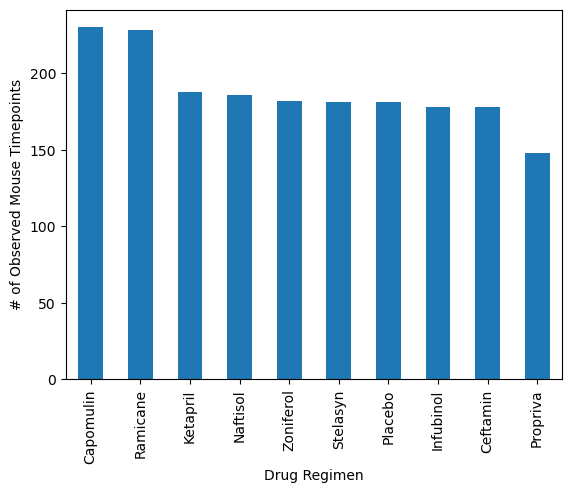

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mousePlot = pd.DataFrame ({"Drug Regimen":mouseDF["Drug Regimen"].value_counts()})
mousePlot.plot(kind = 'bar', legend=False)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

<function matplotlib.pyplot.show(close=None, block=None)>

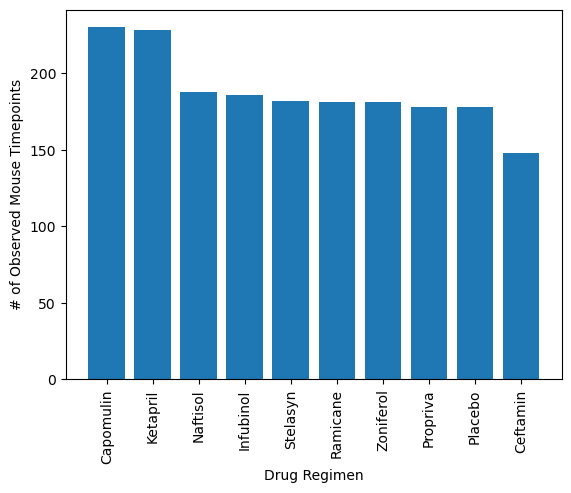

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouseDF["Drug Regimen"].unique(), mouseDF["Drug Regimen"].value_counts(), align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
#plt.ylim(0,260)
plt.xticks(rotation = 90)
plt.show

<Axes: ylabel='Sex'>

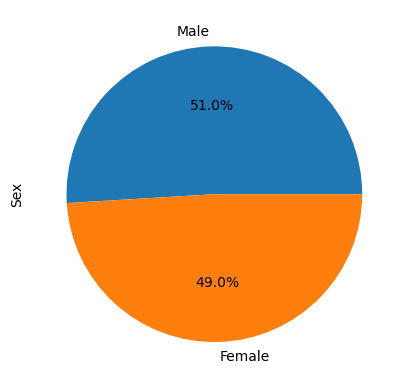

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mousePie = pd.DataFrame ({"Sex":mouseDF["Sex"].value_counts()})
mousePie.plot(kind="pie", y = 'Sex', autopct="%1.1f%%", legend=False)

Text(0, 0.5, 'Sex')

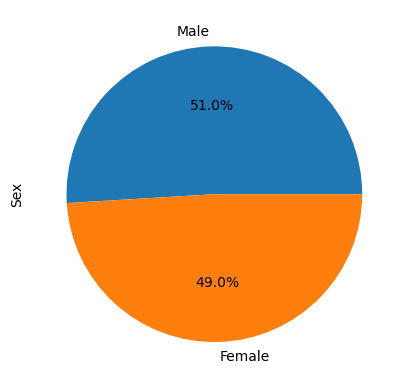

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(mouseDF["Sex"].value_counts(),autopct="%1.1f%%",labels = labels)
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lastTimepointDF = pd.DataFrame({"Timepoint":mouseDF.groupby('Mouse ID')['Timepoint'].max()})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumorSizeDF = pd.merge(lastTimepointDF,mouseDF, on=('Mouse ID','Timepoint'), how="left")
tumorSizeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorSizes = []
for x in range(248):
    if tumorSizeDF["Drug Regimen"][x] == treatments[0] or treatments[1] or treatments[2] or treatments[4]:
        tumorSizes.append(tumorSizeDF['Tumor Volume (mm3)'][x])

        
tumorPlot = {'Capomulin':[], 'Ramicane':[], 'Infubinol':[], 'Ceftamin':[]}

for x in range(248):
    if tumorSizeDF["Drug Regimen"][x] == treatments[0]:
        tumorPlot["Capomulin"].append(tumorSizeDF['Tumor Volume (mm3)'][x])
    elif tumorSizeDF["Drug Regimen"][x] == treatments[1]:
        tumorPlot["Ramicane"].append(tumorSizeDF['Tumor Volume (mm3)'][x])
    elif tumorSizeDF["Drug Regimen"][x] == treatments[2]:
        tumorPlot["Infubinol"].append(tumorSizeDF['Tumor Volume (mm3)'][x])
    elif tumorSizeDF["Drug Regimen"][x] == treatments[3]:
        tumorPlot["Ceftamin"].append(tumorSizeDF['Tumor Volume (mm3)'][x])
tumorDF = pd.DataFrame.from_dict(tumorPlot)        

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerBound = []
upperBound = []
for x in treatments:
    quartiles = tumorDF[x].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{x}'s potential outliers: {round(lower_bound, 3)}, {round(upper_bound, 3)}")
    lowerBound.append(lower_bound)
    upperBound.append(upper_bound)

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: 20.705, 51.832
Ramicane's potential outliers: 17.913, 54.307
Infubinol's potential outliers: 36.833, 82.741
Ceftamin's potential outliers: 25.355, 87.666


Text(0, 0.5, 'Final Tumor Volume (mm3)')

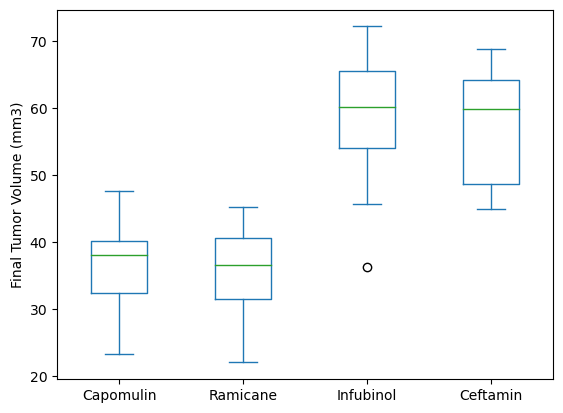

In [37]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumorDF.plot(kind='box')
plt.ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

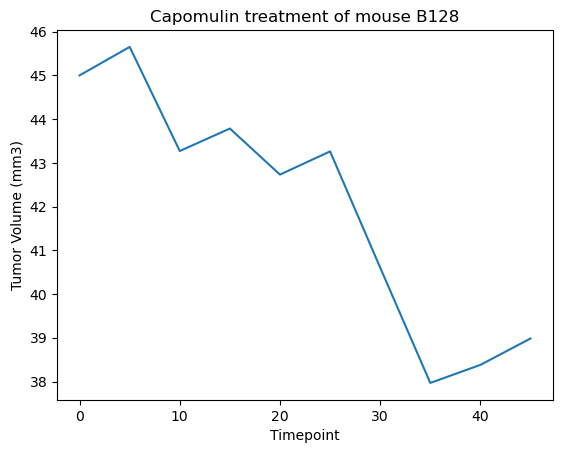

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouseB128 = mouseDF.loc[mouseDF["Mouse ID"] == "b128",:]

mouseB128.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)',legend=False)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse B128')
plt.show

C:\Users\AzureDemise\AppData\Local\Temp\ipykernel_38088\2832262269.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capoDF = capomulinDFG.mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

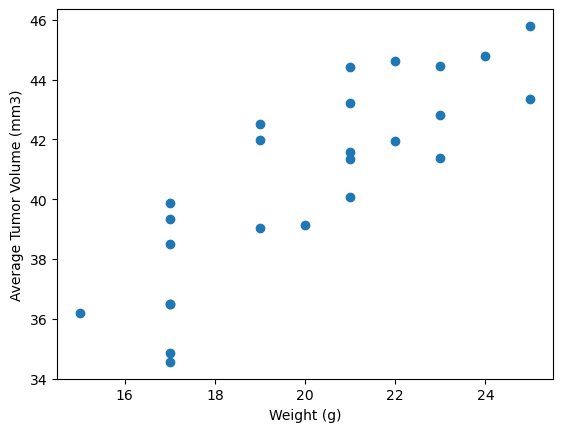

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinDF = mouseDF.loc[mouseDF["Drug Regimen"] == "Capomulin",:]
capomulinDFG = capomulinDF.groupby(["Mouse ID","Drug Regimen"])
capoDF = capomulinDFG.mean()

plt.scatter(capoDF["Weight (g)"],capoDF["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


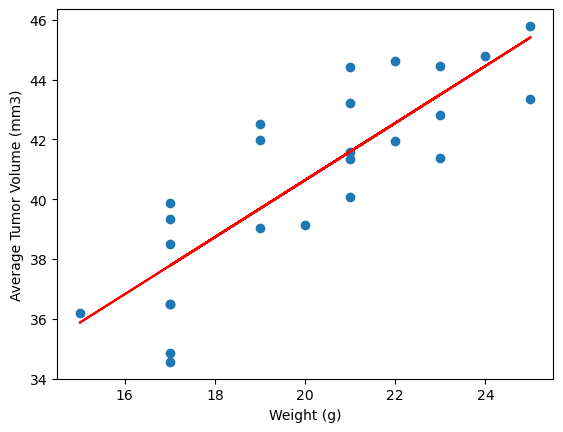

In [44]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capoDF["Weight (g)"]
y_values = capoDF["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(capoDF["Weight (g)"],capoDF["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_values,regress_values,"r-")

correlation = st.pearsonr(capoDF["Weight (g)"],capoDF["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")